# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

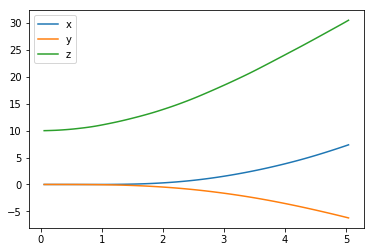

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

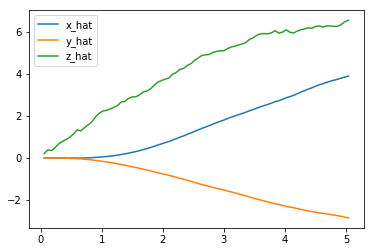

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

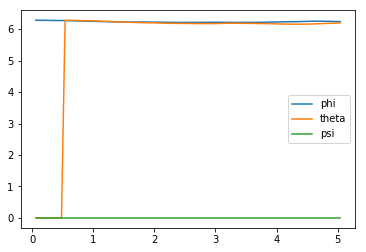

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

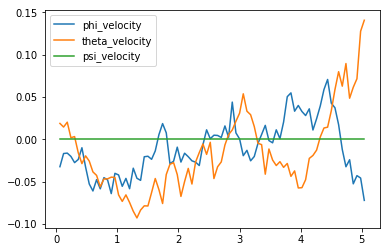

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

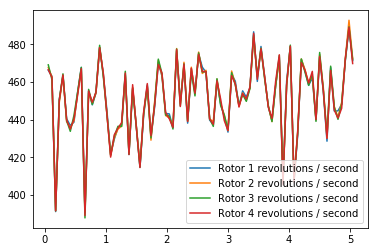

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 7.37316141 -6.22028945 30.54219014  6.23897784  6.20179606  0.        ]
[ 3.88432935 -2.85223339  6.5362017 ]
[-0.07225427  0.14050578  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [2]:
!pip install keras

    100% |################################| 378kB 6.0MB/s ta 0:00:01
    100% |################################| 276kB 6.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import sys
import pandas as pd
import numpy as np
from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
init_pose = np.array([0., 0., 0., 0., 0., 0.])
task = Task(init_pose=init_pose, target_pos=target_pos, runtime=5000)
agent = DDPG(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
#        print("Selected action: {:7.3f}, {:7.3f}, {:7.3f}, {:7.3f}".format(action[0], action[1], action[2], action[3]))
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rState: {:7.3f}, {:7.3f}, {:7.3f}".format(next_state[0], next_state[1], next_state[2]))
#            rewards = np.array([e.reward for e in agent.memory.memory if e is not None]).astype(np.float32).reshape(-1, 1)
            print("\rEp {:4d} reward= {:7.3f}".format(i_episode, reward))

#            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
#                i_episode, 1. , 1., 1.), end="")  # [debug]
            break
    sys.stdout.flush()

State:   0.000,   0.052,   0.021
Ep    1 reward=  -6.051
State:  -0.064,   0.344,   0.000
Ep    2 reward=  -6.413
State:   0.000,   0.002,   0.005
Ep    3 reward=  -6.002
State:  -0.036,   0.634,   0.000
Ep    4 reward=  -6.654
State:  -3.376,   3.318,   0.089
Ep    5 reward= -12.162
State:  -0.374,   0.037,   0.016
Ep    6 reward=  -6.401
State:  -0.027,   0.002,   0.003
Ep    7 reward=  -6.040
State:  -0.005,   0.000,   0.002
Ep    8 reward=  -6.011
State:  -0.007,   0.001,   0.001
Ep    9 reward=  -6.014
State:  -0.008,   0.001,   0.001
Ep   10 reward=  -6.016
State:  -0.009,   0.001,   0.000
Ep   11 reward=  -6.017
State:  -0.010,   0.001,   0.000
Ep   12 reward=  -6.018
State:   0.000,   0.000,   0.000
Ep   13 reward=  -6.002
State:   0.000,   0.000,   0.000
Ep   14 reward=  -6.002
State:   0.000,   0.000,   0.000
Ep   15 reward=  -6.002
State:   0.000,   0.000,   0.000
Ep   16 reward=  -6.002
State:   0.000,   0.000,   0.000
Ep   17 reward=  -6.002
State:   0.000,   0.000,   0.00

State:   0.000,   0.000,   0.001
Ep  145 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  146 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  147 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  148 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  149 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  150 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  151 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  152 reward=  -6.001
State:   0.000,   0.000,   0.001
Ep  153 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  154 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  155 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  156 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  157 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  158 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  159 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  160 reward=  -6.000
State:   0.000,   0.000,   0.001
Ep  161 reward=  -6.000
State:   0.000,   0.000,   0.00

State:   0.301,   0.312,   0.024
Ep  289 reward=  -6.581
State:  -0.112,   0.016,   0.011
Ep  290 reward=  -6.131
State:  -0.078,   0.001,   0.053
Ep  291 reward=  -6.054
State:   0.583,   0.284,   0.031
Ep  292 reward=  -6.811
State:   0.005,   0.083,   0.044
Ep  293 reward=  -6.099
State:   0.010,   0.088,   0.047
Ep  294 reward=  -6.109
State:   0.109,  -0.016,   0.016
Ep  295 reward=  -6.151
State:   0.114,  -0.010,   0.020
Ep  296 reward=  -6.149
State:   0.109,   0.021,   0.030
Ep  297 reward=  -6.149
State:   0.113,  -0.016,   0.015
Ep  298 reward=  -6.157
State:  -0.058,  -0.016,   0.017
Ep  299 reward=  -6.055
State:  -0.060,  -0.018,   0.011
Ep  300 reward=  -6.060
State:  -0.060,  -0.018,   0.011
Ep  301 reward=  -6.061
State:  -0.037,   0.008,   0.039
Ep  302 reward=  -6.018
State:  -0.061,  -0.017,   0.010
Ep  303 reward=  -6.060
State:  -0.062,  -0.017,   0.005
Ep  304 reward=  -6.066
State:  -0.060,  -0.018,   0.007
Ep  305 reward=  -6.064
State:  -0.062,  -0.013,   0.00

State:  -0.000,   0.013,   0.002
Ep  433 reward=  -6.020
State:  -0.000,   0.013,   0.001
Ep  434 reward=  -6.018
State:  -0.025,   0.030,   0.007
Ep  435 reward=  -6.060
State:  -0.000,   0.013,   0.001
Ep  436 reward=  -6.018
State:  -0.026,   0.032,   0.007
Ep  437 reward=  -6.064
State:  -0.000,   0.012,   0.001
Ep  438 reward=  -6.017
State:  -0.025,   0.032,   0.007
Ep  439 reward=  -6.062
State:  -0.000,   0.012,   0.001
Ep  440 reward=  -6.018
State:  -0.026,   0.031,   0.007
Ep  441 reward=  -6.062
State:  -0.000,   0.013,   0.001
Ep  442 reward=  -6.019
State:  -0.000,   0.013,   0.001
Ep  443 reward=  -6.019
State:  -0.000,   0.013,   0.001
Ep  444 reward=  -6.019
State:  -0.000,   0.013,   0.001
Ep  445 reward=  -6.019
State:  -0.026,   0.031,   0.007
Ep  446 reward=  -6.062
State:  -0.026,   0.032,   0.007
Ep  447 reward=  -6.064
State:  -0.025,   0.031,   0.007
Ep  448 reward=  -6.062
State:  -0.000,   0.013,   0.001
Ep  449 reward=  -6.019
State:  -0.026,   0.032,   0.00

State:  -0.000,   0.012,   0.001
Ep  577 reward=  -6.016
State:  -0.000,   0.012,   0.001
Ep  578 reward=  -6.017
State:  -0.026,   0.031,   0.007
Ep  579 reward=  -6.063
State:  -0.025,   0.029,   0.007
Ep  580 reward=  -6.059
State:  -0.027,   0.031,   0.007
Ep  581 reward=  -6.064
State:  -0.026,   0.030,   0.007
Ep  582 reward=  -6.061
State:  -0.026,   0.031,   0.007
Ep  583 reward=  -6.063
State:  -0.000,   0.012,   0.000
Ep  584 reward=  -6.017
State:  -0.000,   0.012,   0.001
Ep  585 reward=  -6.016
State:  -0.000,   0.012,   0.000
Ep  586 reward=  -6.017
State:  -0.026,   0.032,   0.007
Ep  587 reward=  -6.064
State:  -0.025,   0.031,   0.007
Ep  588 reward=  -6.062
State:  -0.000,   0.012,   0.001
Ep  589 reward=  -6.017
State:  -0.000,   0.012,   0.001
Ep  590 reward=  -6.016
State:  -0.025,   0.031,   0.007
Ep  591 reward=  -6.061
State:  -0.026,   0.032,   0.007
Ep  592 reward=  -6.065
State:  -0.026,   0.030,   0.007
Ep  593 reward=  -6.061
State:  -0.000,   0.012,   0.00

State:  -0.026,   0.027,   0.008
Ep  721 reward=  -6.057
State:  -0.026,   0.028,   0.007
Ep  722 reward=  -6.058
State:  -0.026,   0.028,   0.008
Ep  723 reward=  -6.058
State:  -0.026,   0.028,   0.008
Ep  724 reward=  -6.059
State:  -0.025,   0.028,   0.007
Ep  725 reward=  -6.058
State:  -0.026,   0.029,   0.007
Ep  726 reward=  -6.060
State:  -0.026,   0.030,   0.007
Ep  727 reward=  -6.060
State:  -0.025,   0.030,   0.007
Ep  728 reward=  -6.060
State:  -0.025,   0.029,   0.007
Ep  729 reward=  -6.058
State:  -0.026,   0.030,   0.007
Ep  730 reward=  -6.062
State:  -0.025,   0.030,   0.007
Ep  731 reward=  -6.060
State:  -0.026,   0.029,   0.007
Ep  732 reward=  -6.060
State:  -0.026,   0.029,   0.007
Ep  733 reward=  -6.060
State:  -0.026,   0.029,   0.007
Ep  734 reward=  -6.059
State:  -0.026,   0.031,   0.007
Ep  735 reward=  -6.062
State:  -0.025,   0.030,   0.007
Ep  736 reward=  -6.060
State:  -0.026,   0.030,   0.007
Ep  737 reward=  -6.061
State:  -0.026,   0.030,   0.00

State:  -0.026,   0.013,   0.009
Ep  865 reward=  -6.040
State:  -0.026,   0.014,   0.010
Ep  866 reward=  -6.040
State:  -0.026,   0.011,   0.009
Ep  867 reward=  -6.038
State:  -0.026,   0.009,   0.010
Ep  868 reward=  -6.035
State:  -0.026,   0.009,   0.010
Ep  869 reward=  -6.035
State:  -0.026,   0.009,   0.010
Ep  870 reward=  -6.036
State:  -0.026,   0.009,   0.010
Ep  871 reward=  -6.036
State:  -0.026,   0.009,   0.010
Ep  872 reward=  -6.036
State:  -0.026,   0.009,   0.010
Ep  873 reward=  -6.036
State:  -0.026,   0.011,   0.010
Ep  874 reward=  -6.038
State:  -0.025,   0.012,   0.009
Ep  875 reward=  -6.038
State:  -0.026,   0.011,   0.009
Ep  876 reward=  -6.037
State:  -0.026,   0.013,   0.010
Ep  877 reward=  -6.040
State:  -0.026,   0.013,   0.010
Ep  878 reward=  -6.041
State:  -0.026,   0.014,   0.010
Ep  879 reward=  -6.042
State:  -0.025,   0.015,   0.010
Ep  880 reward=  -6.042
State:  -0.026,   0.015,   0.010
Ep  881 reward=  -6.043
State:  -0.026,   0.014,   0.00

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
## TODO: Train your agent here.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: